In [1]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
color_pallete = ['r','m','y','c', 'brown', 'orange','m','k', 'gray','purple','seagreen']

In [3]:
cluster_centers = [[1, 1],
           [2, 4],
           [5, 8]]

In [4]:
sigmas = [[0.5, 0.6],
          [0.4, 0.5],
          [0.1, 0.6]]



In [28]:
# Generate test data
np.random.seed(5)  


xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(cluster_centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))



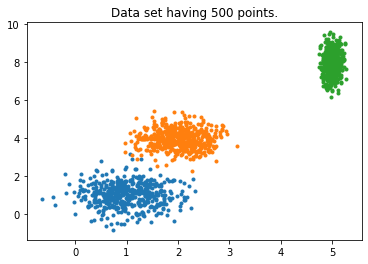

In [29]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(5):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.')
ax0.set_title('Data set having 500 points.')
plt.show()

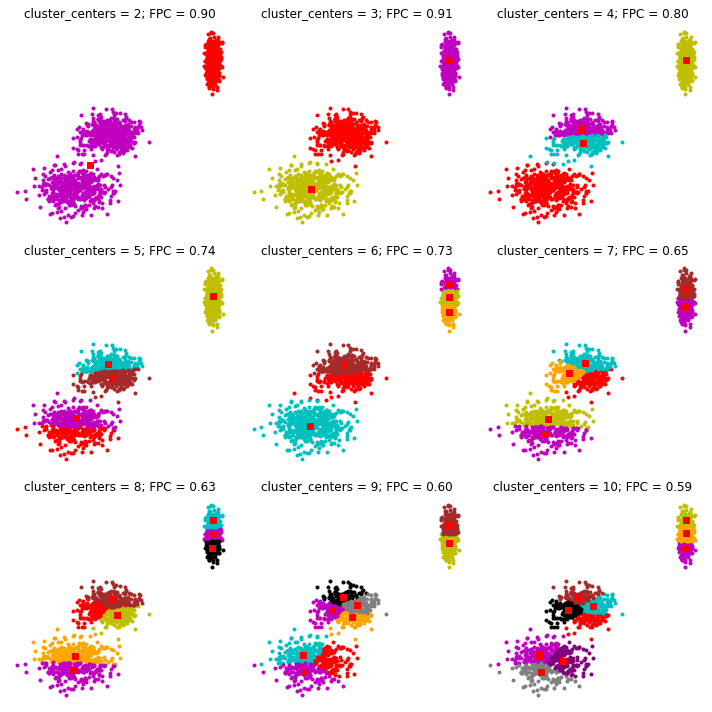

In [30]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('cluster_centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

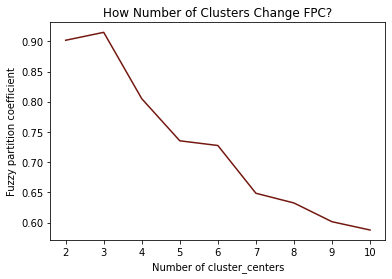

In [31]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("How Number of Clusters Change FPC?")
ax2.set_xlabel("Number of cluster_centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

In [8]:
import pandas as pd
data = pd.read_csv('vehicle.csv')
import matplotlib.pyplot as plt


In [9]:
data = data.dropna()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)



KMeans(n_clusters=2)

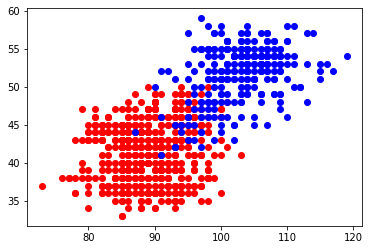

In [6]:

pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred

color=['red','blue','orange', 'brown', 'green']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["compactness"],data["circularity"],c=color[k])
plt.show()

In [10]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels


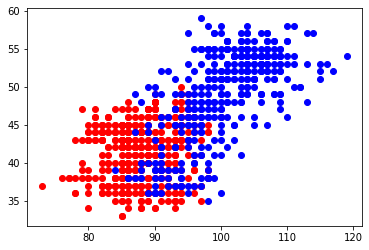

In [11]:
color=['red','blue','orange', 'brown', 'green']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["compactness"],data["circularity"],c=color[k])
plt.show()

In [14]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

from numpy import random
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns


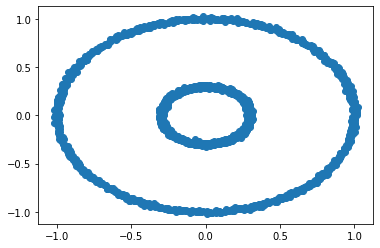

In [50]:
data, clusters = make_circles(n_samples=2000, noise=.01, factor=.3, random_state=5)
plt.scatter(data[:,0], data[:,1])

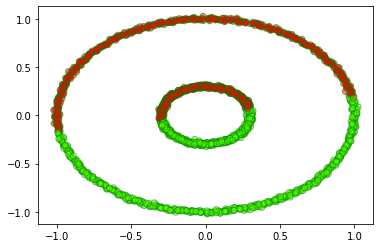

In [51]:
kmeans = KMeans(init='k-means++', n_clusters=2)
km_clustering = kmeans.fit(data)
plt.scatter(data[:,0], data[:,1], c=km_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')

/Users/vaibhavverdhan/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


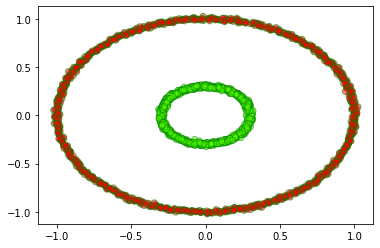

In [52]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=5)
sc_clustering = spectral.fit(data)
plt.scatter(data[:,0], data[:,1], c=sc_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')


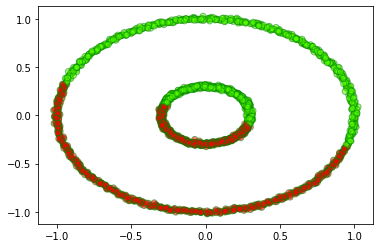

In [55]:
spectral = SpectralClustering(n_clusters=2, affinity='rbf', random_state=5)
sc_clustering = spectral.fit(data)
plt.scatter(data[:,0], data[:,1], c=sc_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')
